### Employment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [2]:
employment = pd.read_csv("../Employment - FAOSTAT_data_en_2-27-2024.csv")
employment.head()


,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN


In [3]:
# Checking for missing values
missing_values = employment.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Indicator Code         0
Indicator              0
Sex Code               0
Sex                    0
Year Code              0
Year                   0
Element Code           0
Element                0
Source Code            0
Source                 0
Unit                   0
Value                  0
Flag                   0
Flag Description       0
Note                2155
dtype: int64


In [4]:
# Handling missing values if any
employment_cleaned = employment.dropna(axis=0).reset_index(drop=True)
employment_cleaned

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2008,2008,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3367.11,X,Figure from international organizations,Adjusted
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2014,2014,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3418.12,X,Figure from international organizations,Adjusted
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2017,2017,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3615.86,X,Figure from international organizations,Adjusted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21144,"Employment in agriculture, forestry and fishin...",1,Total,2014,2014,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3321.48,X,Figure from international organizations,Adjusted
3758,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21144,"Employment in agriculture, forestry and fishin...",1,Total,2019,2019,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3417.49,X,Figure from international organizations,Adjusted
3759,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21150,Mean weekly hours actually worked per employed...,1,Total,2004,2004,6173,Value,3023,Labour force survey,No,44.14,X,Figure from international organizations,Working time arrangement coverage: Full-time w...
3760,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3023,Labour force survey,No,20.01,X,Figure from international organizations,Job coverage: Main job currently held Reposito...


In [5]:
# Handling missing values if any
employment_cleaned = employment.dropna(axis=1).reset_index(drop=True)
employment_cleaned

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21144,"Employment in agriculture, forestry and fishin...",1,Total,2020,2020,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3443.50,X,Figure from international organizations
5913,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21144,"Employment in agriculture, forestry and fishin...",1,Total,2021,2021,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3512.15,X,Figure from international organizations
5914,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21150,Mean weekly hours actually worked per employed...,1,Total,2004,2004,6173,Value,3023,Labour force survey,No,44.14,X,Figure from international organizations
5915,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3023,Labour force survey,No,20.01,X,Figure from international organizations


### Converting Categorial colunm to numbers

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in employment_cleaned.columns:
    if employment_cleaned[col].dtype == 'object':
        employment_cleaned[col] = label_encoder.fit_transform(employment_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(employment_cleaned), columns=employment_cleaned.columns)


In [7]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.636364,0.636364,0.0,0.0,0.12,0.166667,1.0,0.000088,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.772727,0.772727,0.0,0.0,0.12,0.166667,1.0,0.000082,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.00,0.500000,0.0,0.007706,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,1.0,0.0,1.00,0.500000,0.0,0.007816,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,1.0,0.0,1.00,0.500000,0.0,0.008072,0.0,0.0


### Model Training and Evaluation

In [12]:

# Select relevant features
selected_features = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Indicator Code', 'Indicator', 'Sex Code', 'Sex', 'Year Code', 'Year', 'Element Code', 'Element', 'Source Code', 'Source', 'Unit', 'Value', 'Flag', 'Flag Description']
employment_selected = df_normalized[selected_features]


In [13]:
# Split the dataset into features (X) and target variable (y)
X = employment_selected[['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Indicator Code', 'Indicator', 'Sex Code', 'Sex', 'Year Code', 'Year', 'Element Code', 'Element', 'Source Code', 'Source', 'Unit', 'Flag', 'Flag Description']]
y = employment_selected['Value']


In [14]:
X.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Flag,Flag Description
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.636364,0.636364,0.0,0.0,0.12,0.166667,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.772727,0.772727,0.0,0.0,0.12,0.166667,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.00,0.500000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,1.0,0.0,1.00,0.500000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,1.0,0.0,1.00,0.500000,0.0,0.0,0.0


In [15]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

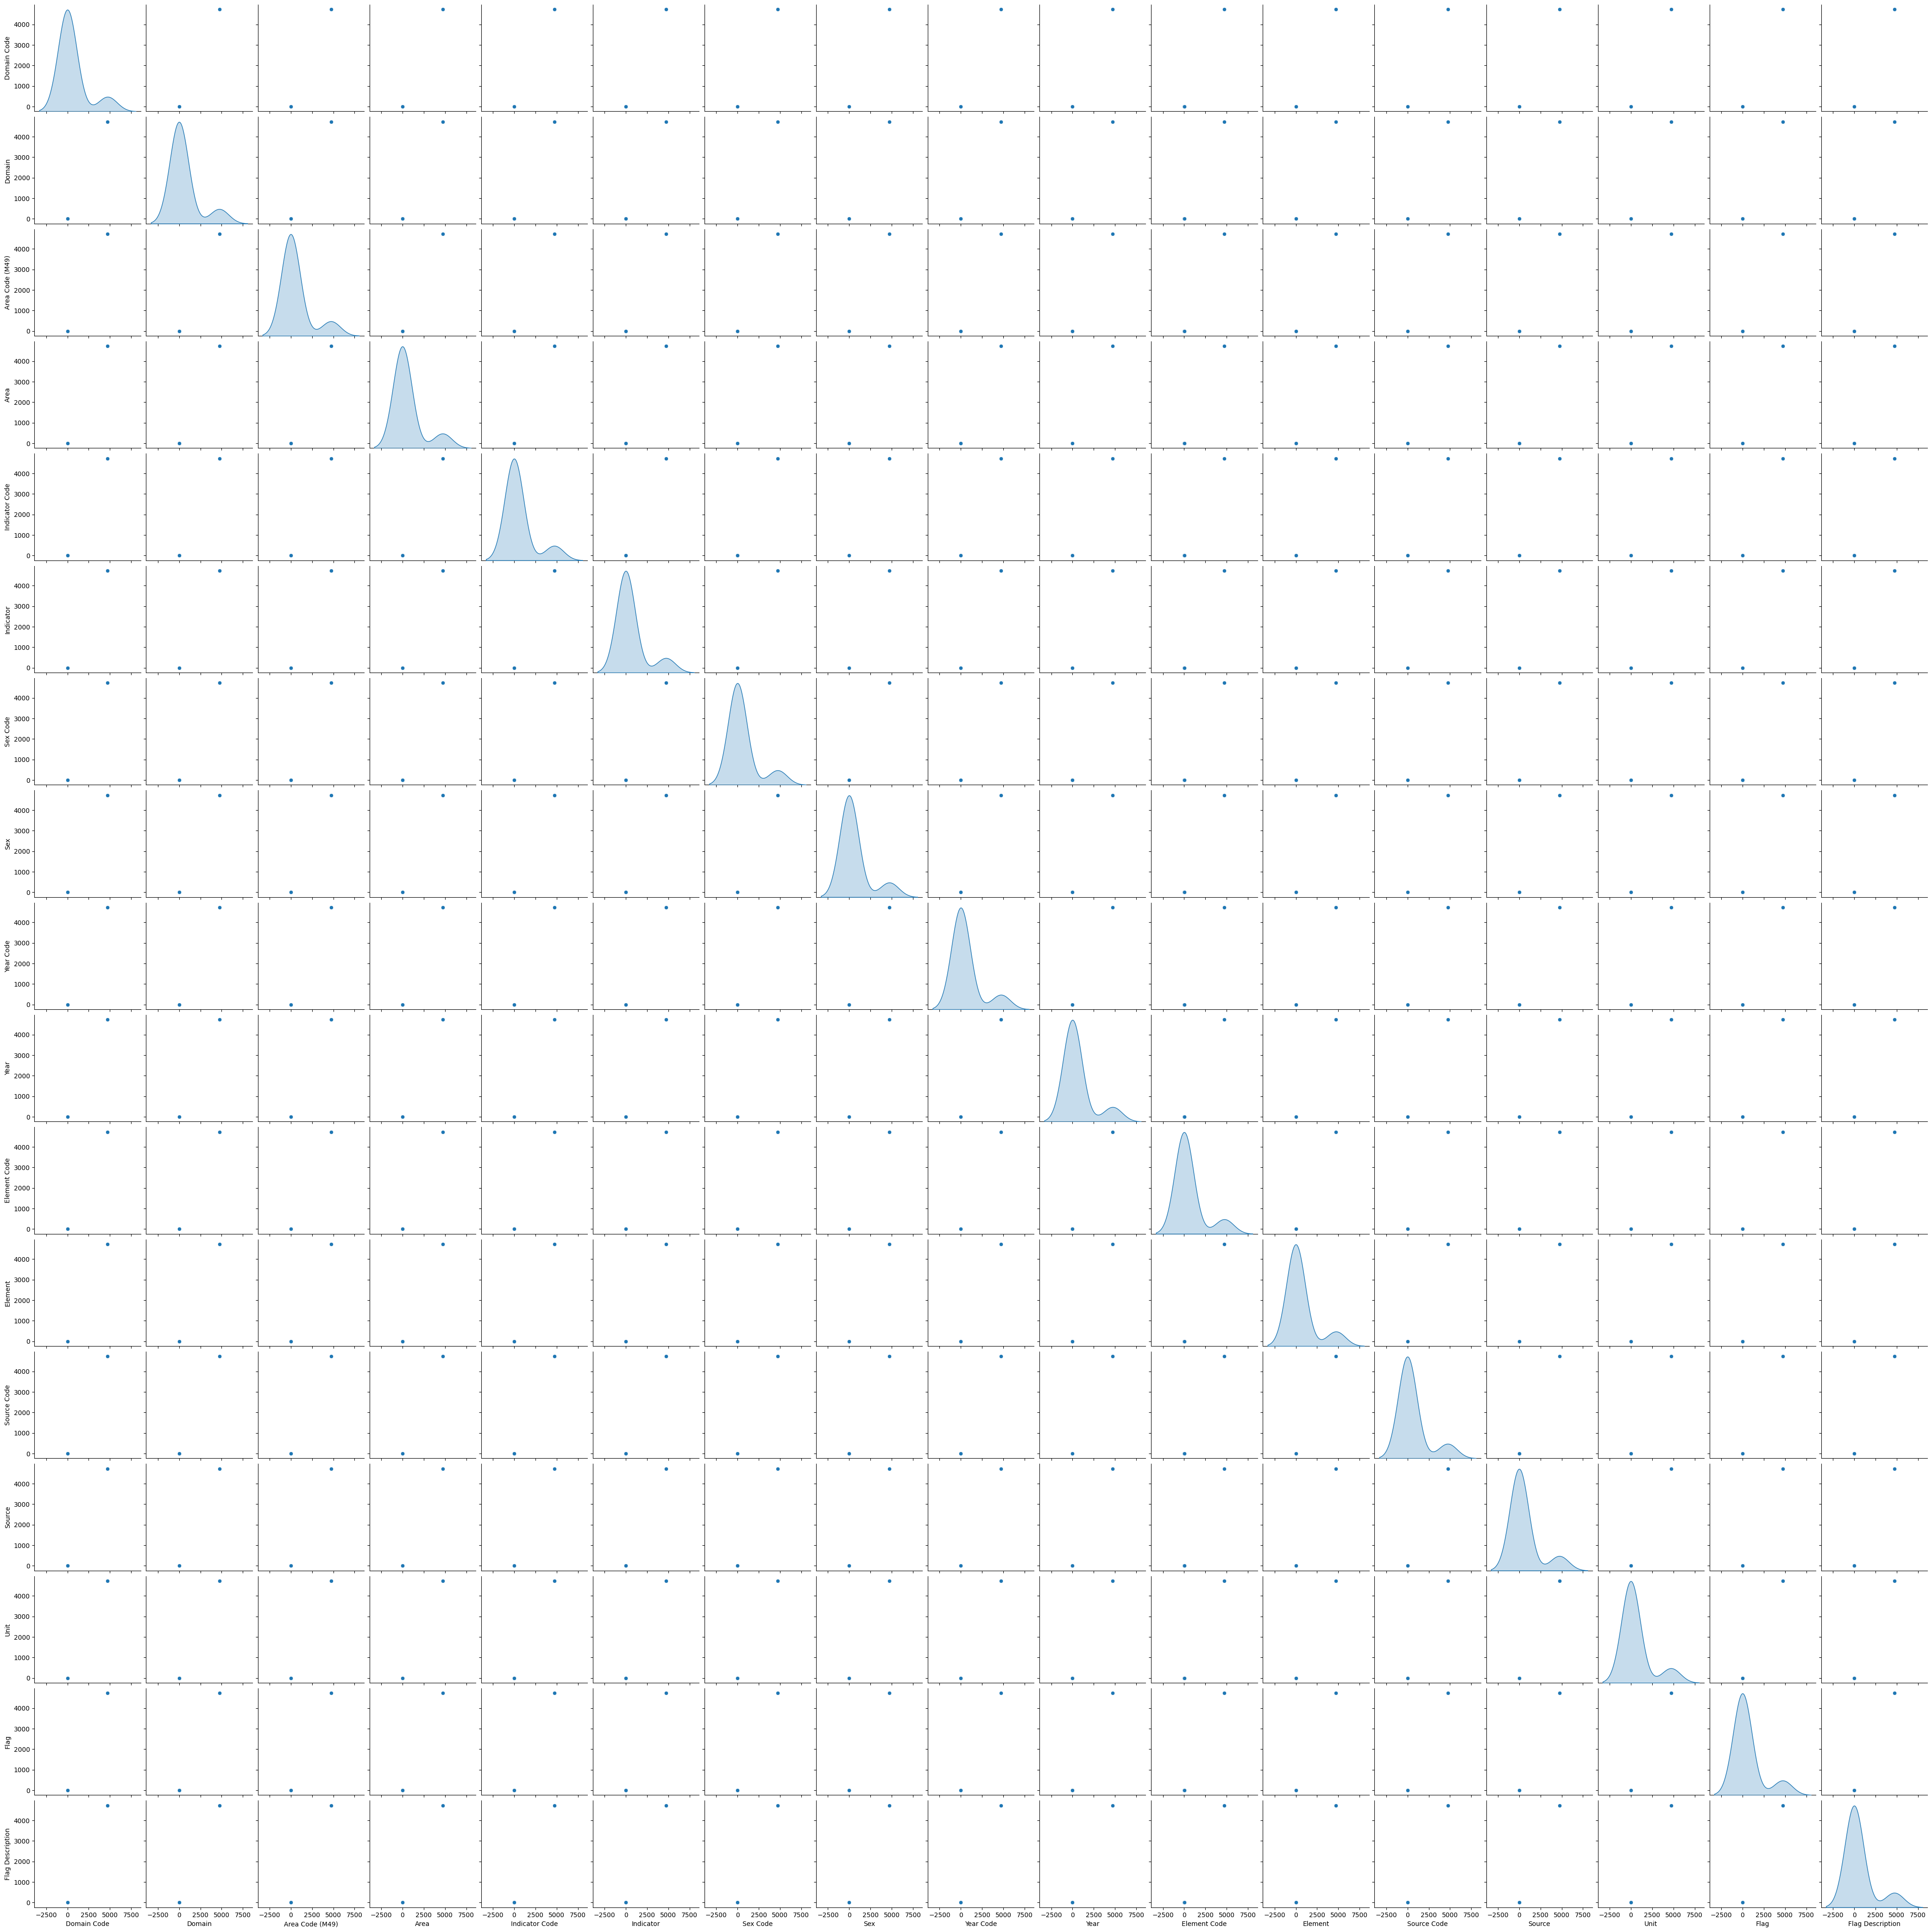

In [16]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [17]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 0.006783018031953256
Linear Regression Mean Absolute Error: 0.02199789759173305


In [19]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 0.006652232667859191
MLP Regression Mean Absolute Error: 0.022490745348469864


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

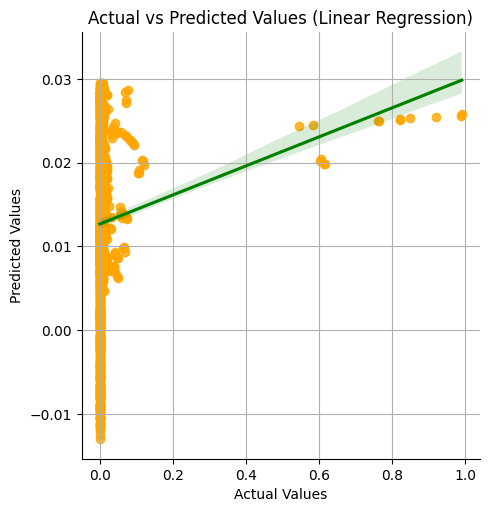

<Figure size 1000x600 with 0 Axes>

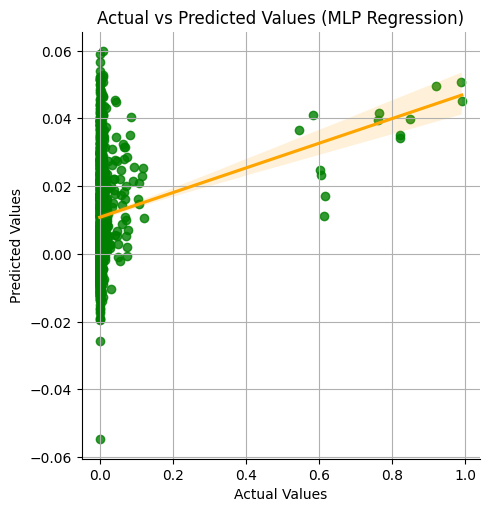

In [20]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


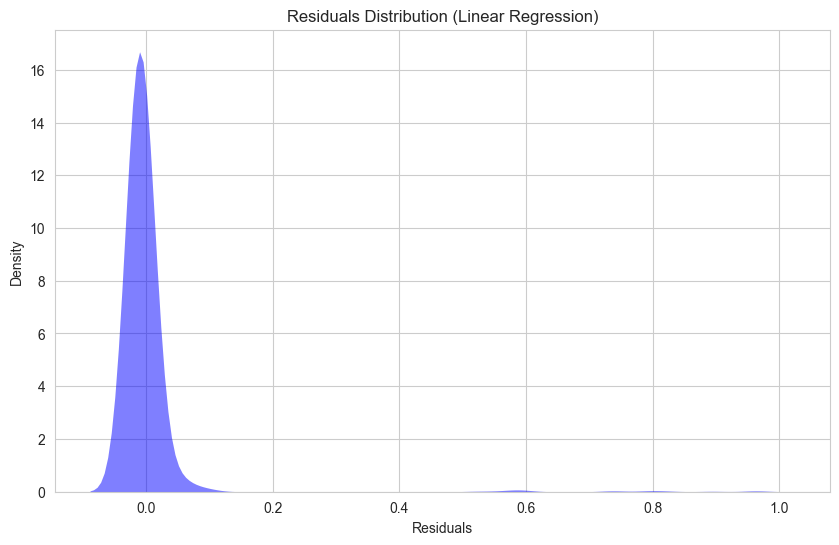

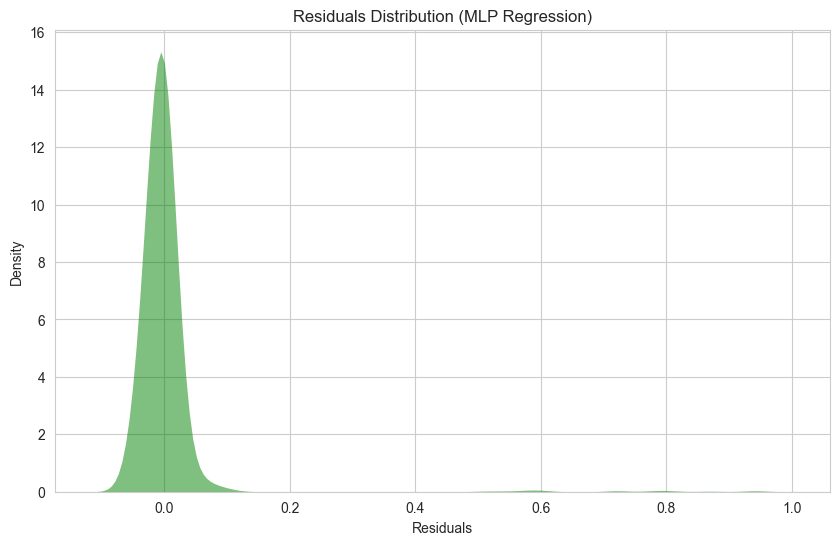

In [21]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.0655304  0.07536834 0.06795942 0.06806926 0.08504351]
Linear Regression Mean RMSE: 0.07239418488832923
MLP Cross-Validation RMSE Scores: [0.0657818  0.07544319 0.06799452 0.0678988  0.08453577]
MLP Mean RMSE: 0.07233081595232857


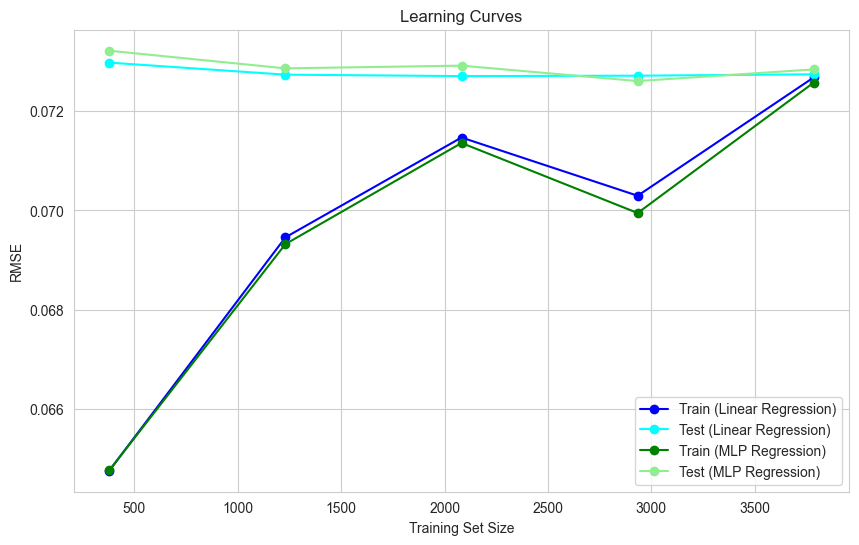

In [22]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.636364,0.636364,0.0,0.0,0.12,0.166667,1.0,0.000088,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.772727,0.772727,0.0,0.0,0.12,0.166667,1.0,0.000082,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.00,0.500000,0.0,0.007706,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,1.0,0.0,1.00,0.500000,0.0,0.007816,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,1.0,0.0,1.00,0.500000,0.0,0.008072,0.0,0.0


In [24]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Indicator Code,Indicator,Sex Code,Sex,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.636364,0.0,0.0,0.12,0.166667,1.0,0.000088,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.772727,0.0,0.0,0.12,0.166667,1.0,0.000082,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.00,0.500000,0.0,0.007706,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,1.0,0.0,1.00,0.500000,0.0,0.007816,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,1.00,0.500000,0.0,0.008072,0.0,0.0


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [29]:
area_column = employment[['Area', 'Year Code']]

employment_cleaned_area_concat = pd.concat([df_normalized, area_column], axis=1)

employment_cleaned_area_concat.head()

,Domain Code,Domain,Area Code (M49),Indicator Code,Indicator,Sex Code,Sex,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.636364,0.0,0.0,0.12,0.166667,1.0,0.000088,0.0,0.0,Afghanistan,2014
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.772727,0.0,0.0,0.12,0.166667,1.0,0.000082,0.0,0.0,Afghanistan,2017
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.00,0.500000,0.0,0.007706,0.0,0.0,Afghanistan,2000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,1.0,0.0,1.00,0.500000,0.0,0.007816,0.0,0.0,Afghanistan,2001
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,1.00,0.500000,0.0,0.008072,0.0,0.0,Afghanistan,2002


### Model Deployment

In [31]:
# Train a separate model for each geographical region and save them
regions = employment_cleaned_area_concat['Area'].unique()
for region in regions:
    region_data = employment_cleaned_area_concat[employment_cleaned_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_employment/model_employment_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_employment/model_employment_Afghanistan.joblib
Model for Albania saved as ../model_deployment/model_employment/model_employment_Albania.joblib
Model for Algeria saved as ../model_deployment/model_employment/model_employment_Algeria.joblib
Model for Angola saved as ../model_deployment/model_employment/model_employment_Angola.joblib
Model for Argentina saved as ../model_deployment/model_employment/model_employment_Argentina.joblib
Model for Armenia saved as ../model_deployment/model_employment/model_employment_Armenia.joblib
Model for Aruba saved as ../model_deployment/model_employment/model_employment_Aruba.joblib
Model for Australia saved as ../model_deployment/model_employment/model_employment_Australia.joblib
Model for Austria saved as ../model_deployment/model_employment/model_employment_Austria.joblib
Model for Azerbaijan saved as ../model_deployment/model_employment/model_employment_Azerbaijan.joblib
Model for Bahamas saved 

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025         -6.772126
1  2026         -6.775475
2  2027         -6.778824

Forecast for Albania:
   Year  Forecasted_Value
0  2025         -1.541656
1  2026         -1.542418
2  2027         -1.543180

Forecast for Algeria:
   Year  Forecasted_Value
0  2025         -4.872760
1  2026         -4.875169
2  2027         -4.877577

Forecast for Angola:
   Year  Forecasted_Value
0  2025         34.536082
1  2026         34.553134
2  2027         34.570187

Forecast for Argentina:
   Year  Forecasted_Value
0  2025         -4.358419
1  2026         -4.360573
2  2027         -4.362727

Forecast for Armenia:
   Year  Forecasted_Value
0  2025         -0.838966
1  2026         -0.839381
2  2027         -0.839796

Forecast for Aruba:
   Year  Forecasted_Value
0  2025          0.000101
1  2026          0.000101
2  2027          0.000101

Forecast for Australia:
   Year  Forecasted_Value
0  2025         -0.160156
1  2026         -0.160236
2  202

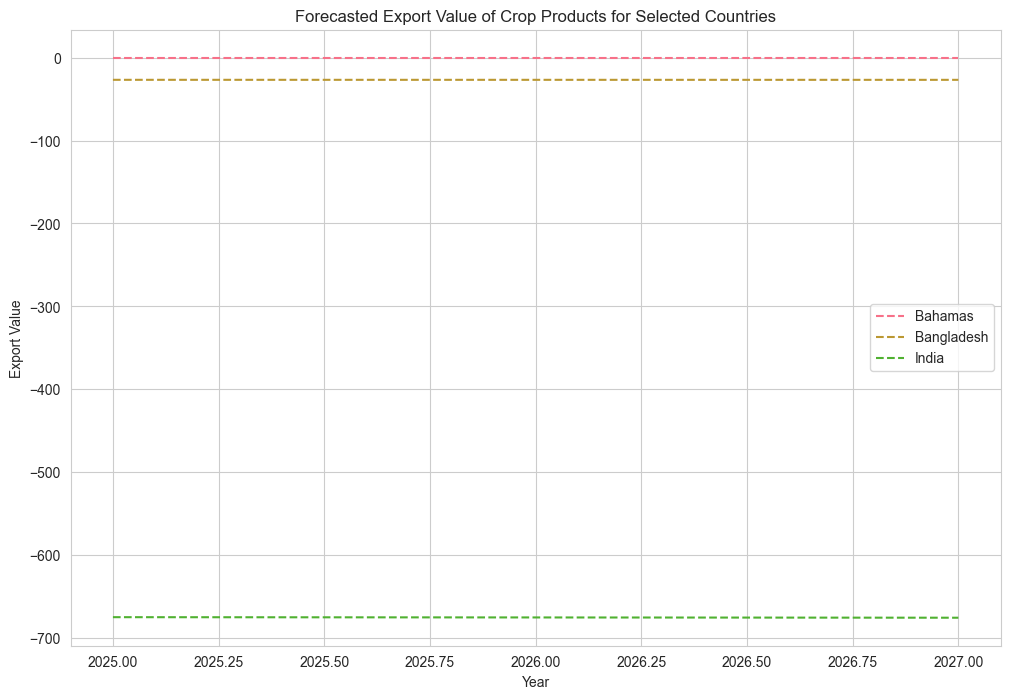

In [32]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_employment/model_employment_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = employment_cleaned_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Bahamas', 'Bangladesh', 'India']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()
